## A 1D synthetic

We'll stick to zero-offset, so pure acoustic reflection.

We'll also do everything in time, so there's no pesky time or depth conversion.

### Define earth model

In [1]:
import numpy as np

thickness = [100, 100, 50, 150, 50, 200]  # In milliseconds

vp = [1486, 2000, 2100, 2200, 2150, 2400]
rho = [1000, 2150, 2250, 2300, 2250, 2350]

In [2]:
def make_log(log, thickness):
    out = []
    for thick, x in zip(thickness, log):
        out += thick * [x]
    time = np.arange(0, sum(thickness)) / 1000
    return np.array(out), time

In [3]:
vp, t = make_log(vp, thickness)
rho, _ = make_log(rho, thickness)

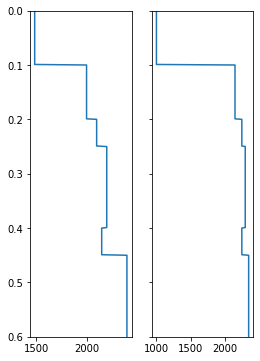

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(4, 6), sharey=True)

ax = axs[0]
ax.plot(vp, t)
ax.set_ylim(0.6, 0)

ax = axs[1]
ax.plot(rho, t)

plt.show()

### Compute reflection coefficients

The reflection coefficients are given by this equation:

$$ R_0 = \frac{I_\mathrm{lower} - I_\mathrm{upper}}{I_\mathrm{lower} + I_\mathrm{upper}} $$

Where $I$ is the impedance, which is the product of $V_\mathrm{P}$ and $\rho$.

In [5]:
I = vp * rho

In [6]:
I_lower = I[1:]
I_upper = I[:-1]

R0 = (I_lower - I_upper) / (I_lower + I_upper)

Let's plot what we have:

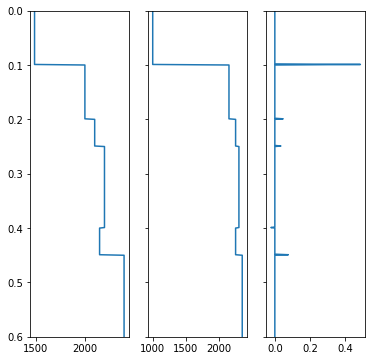

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(6, 6), sharey=True)

ax = axs[0]
ax.plot(vp, t)
ax.set_ylim(0.6, 0)

ax = axs[1]
ax.plot(rho, t)

ax = axs[2]
plt.plot(R0, t[:-1])

plt.show()

### Make wavelet

Let's just use `bruges`:

In [8]:
import bruges as bg

w = bg.filters.ricker(duration=0.1, dt=0.001, f=30)  # Also 1 ms sample interval.

### Convolve wavelet with R0

In [9]:
syn = np.convolve(R0, w, mode='same')

### Plot the synthetic

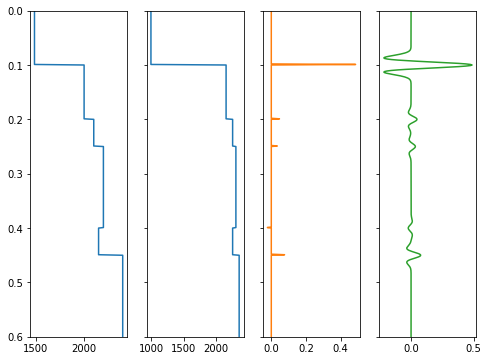

In [11]:
fig, axs = plt.subplots(ncols=4, figsize=(8, 6), sharey=True)

ax = axs[0]
ax.plot(vp, t)
ax.set_ylim(0.6, 0)

ax = axs[1]
ax.plot(rho, t)

ax = axs[2]
ax.plot(R0, t[:-1], c='C1')

ax = axs[3]
ax.plot(syn, t[:-1], c='C2')

plt.show()

## Make interactive

In [21]:
from ipywidgets import interact

@interact(f=(4, 60, 4), )
def make_plot(f=30):
    
    w = bg.filters.ricker(duration=0.4, dt=0.001, f=f)
    syn = np.convolve(R0, w, mode='same')
    
    fig, axs = plt.subplots(ncols=4, figsize=(8, 6), sharey=True)

    ax = axs[0]
    ax.plot(vp, t)
    ax.set_ylim(0.6, 0)
    ax.set_title('Vp')

    ax = axs[1]
    ax.plot(rho, t)
    ax.set_title('rho')

    ax = axs[2]
    ax.plot(R0, t[:-1], c='C1')
    ax.set_title('R')

    ax = axs[3]
    ax.plot(syn, t[:-1], c='C2')
    ax.set_title('syn')
    
    plt.show()
    
    return

interactive(children=(IntSlider(value=30, description='f', max=60, min=4, step=4), Output()), _dom_classes=('w…